# Logistic Regression Notes and Practice

In [39]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# sibsp - sibling/parent parch - parent/children

## EDA

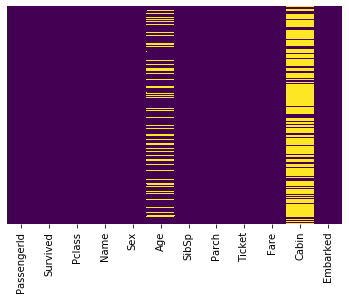

In [6]:
# heatmap - identify missing information 
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# some age and cabin data are missing 
# age can be fillable (average of ages... )

In [7]:
#styling
sns.set_style('whitegrid')

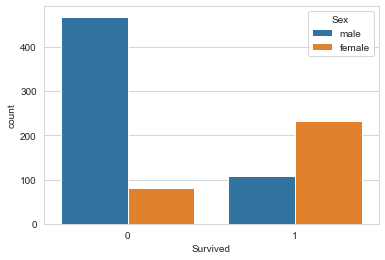

In [14]:
# survival 
sns.countplot(x='Survived', data=train, hue='Sex')
# 0 did not survive, 1 = survived
# More female survival compared to male

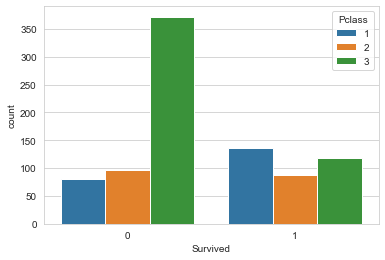

In [15]:
# Survival based on passenger class
sns.countplot(x='Survived', data=train, hue='Pclass')
# assume more deaths in the 3rd class vs 1st class

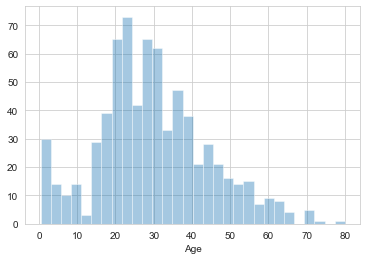

In [16]:
# idenitfy age of passengers onboard
sns.distplot(train['Age'].dropna(), kde=False, bins = 30)



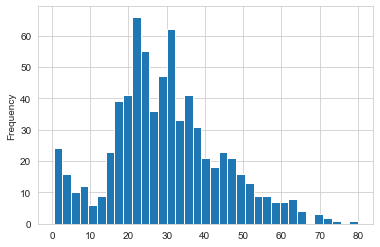

In [17]:
# same plot without sns
train['Age'].plot.hist(bins=35)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


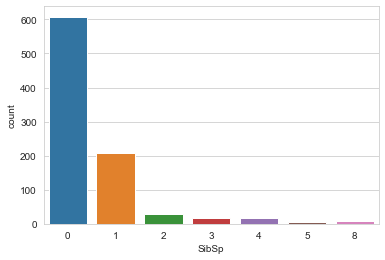

In [21]:
# did they have children/spouse on board - 
sns.countplot(x='SibSp', data=train)

# Most singles 

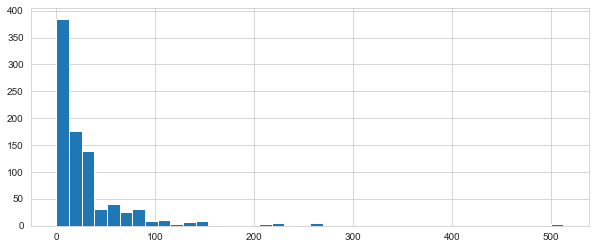

In [26]:
# How much people paid
train['Fare'].hist(bins=40, figsize=(10,4))

#purchase price - most are in the cheaper class

In [30]:
# same plot with cufflinks
import cufflinks as cf


In [31]:
cf.go_offline()

In [34]:
train['Fare'].iplot(kind='hist', bins=50)

# Cleaning the data for ML
# fixing the missing age 



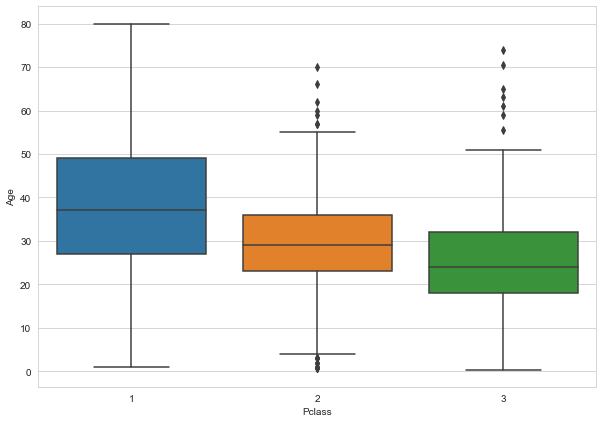

In [40]:
#simple way to idenitify age 
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [44]:
#impute missing age - add age by average by passenger class
def imput_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass ==2:
            return 29
        else: 
            return 24
    else: 
        return Age
    

In [45]:
train['Age'] = train[['Age', 'Pclass']].apply(imput_age, axis=1)

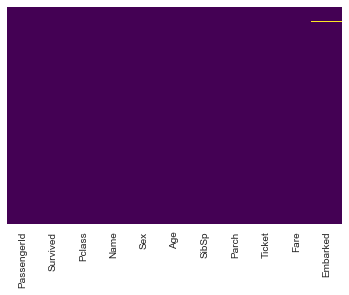

In [49]:
#check to ensure age is filled - 
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [47]:
# due to high missing value in cabin - we should drop
train.drop('Cabin', axis=1, inplace=True)

In [51]:
# remove some other na - small 
train.dropna(inplace=True)

In [54]:
# change sex from male/female to 0/1 for ML
#dummy variable

sex = pd.get_dummies(train['Sex'], drop_first=True)

In [57]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [59]:
# concat new dummy columns to data frame
train = pd.concat([train, sex, embark], axis = 1)

In [60]:
# we can remove sex/embarked columns 
# Also no need for Name, Ticket  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [61]:
train.drop(['Sex', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [62]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [63]:
#Passenger ID is not useful - its only an index
train.drop('PassengerId', axis=1, inplace=True)

In [64]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [65]:
# we can run dummies on Pclass - because it's a categorical column (1, 2, 3 only)

## Running Machine Learning

In [76]:
X = train.drop('Survived', axis=1)
y = train['Survived'] #predict

In [70]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [79]:
from sklearn.linear_model import LogisticRegression


In [80]:
logmodel = LogisticRegression()

In [81]:
# training the model with the data
logmodel.fit(X_train, y_train)

C:\Users\Drew\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [82]:
# your prediction using the model
predictions = logmodel.predict(X_test)

In [83]:
# evaluate model
from sklearn.metrics import classification_report

In [84]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [85]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[147,  16],
       [ 30,  74]], dtype=int64)

In [ ]:
# increase accurace 
# - feature engineering cabins, names etc... 